In [1]:
using DataFrames

include("src/spectrum.jl")
include("src/modesolutions.jl")
include("src/shgintegration.jl")
include("src/shg.jl")
include("src/basic.jl")

query (generic function with 1 method)

## 配置参数范围，扫描给定波长范围的基频模式

In [59]:
lambda_f = [1520, 1580] # 扫谱波长范围 nm
lambda_shg = lambda_f/2 # 倍频光扫谱波长范围 nm
mode = "TE" # 电磁场模式
R = 25 # WGM 半径
n = 2.2 # 折射率

 # 非线性张量
d22 = 2.1
d31 = -4.3
d33 = -27
d14 = 170
d = [[0, 0, 0, 0, d31, -d22], [-d22, d22, 0, d31, 0, 0], [d31, d31, d33, 0, 0, 0]]
# d = [[0, 0, 0, d14, 0, 0], [0, 0, 0, 0, d14, 0], [0, 0, 0, 0, 0, d14]]

# 扫描最大径向阶数
n_num_max = 1 

1

In [60]:
# 扫谱
data_f = spectrum(lambda_f, mode, n_num_max, n, R, Q_factor="open", option="n_num depend");

Finished ✓      100%|███████████████████████████████████| Time: 0:00:37


### 基频模式存入文件

In [61]:
# 扫谱结果存入文件
path_f = "/Users/wenzhengliu/Research/temp_data/radius=$R refractive_id=$n wavelength=$lambda_f'nm' n_max=$n_num_max mode=$mode.csv"
CSV.write(path_f, data_f)

"/Users/wenzhengliu/Research/temp_data/radius=50 refractive_id=2.2 wavelength=[1520, 1580]'nm' n_max=1 mode=TE.csv"

## 配置参数范围，扫描给定波长范围的倍频模式

In [62]:
data_shg = spectrum(lambda_shg, mode, n_num_max, n, R, Q_factor="open", option="n_num depend");

Finished ✓      100%|███████████████████████████████████| Time: 0:01:54


### 倍频模式存入文件

In [63]:
# 扫谱结果存入文件
path_shg = "/Users/wenzhengliu/Research/temp_data/radius=$R refractive_id=$n wavelength=$lambda_shg'nm' n_max=$n_num_max mode=$mode.csv"
CSV.write(path_shg, data_shg)

"/Users/wenzhengliu/Research/temp_data/radius=50 refractive_id=2.2 wavelength=[760.0, 790.0]'nm' n_max=1 mode=TE.csv"

## 光谱图

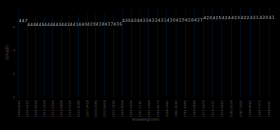

In [44]:
# 显示谱线结果
view_spectrum(lambda_f, data_f, 1, view_mode="details")

## 选定某一模式，绘制场分布图

In [67]:
# 查看对应模式的波长
# println(query(n_num, l_num, option=data_shg))

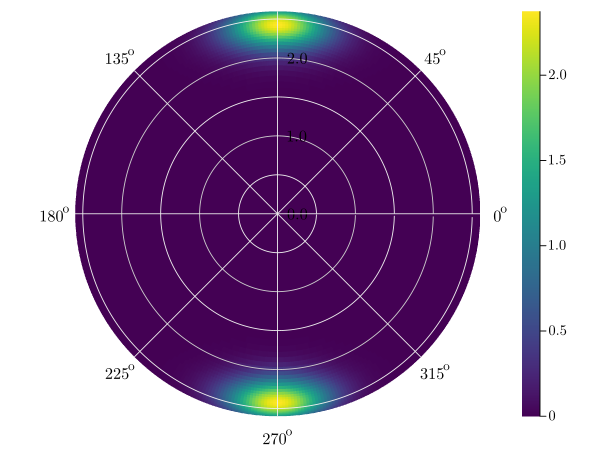

In [9]:
# 作图，给定模式数
n_num, l_num, m_num = 1, 30, 30
view_field(data_f, n_num, l_num, m_num, n, R, mode, "E", quality="coarse", scale="normal")

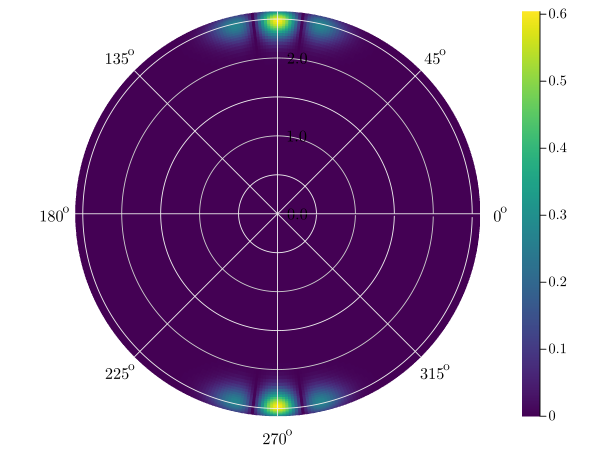

In [5]:
n_num, l_num, m_num = 1, 60, 60

view_field(data_shg, n_num, l_num, m_num, n, R, mode, "E", quality="coarse", scale="normal")

In [51]:
# TE模式与TM模式汇总
path_f1 = "/Users/wenzhengliu/Research/temp_data/radius=$R refractive_id=$n wavelength=$lambda_f'nm' n_max=$n_num_max mode=TE.csv"
path_f2 = "/Users/wenzhengliu/Research/temp_data/radius=$R refractive_id=$n wavelength=$lambda_f'nm' n_max=$n_num_max mode=TM.csv"
data_f1 = CSV.File(path_f1)
data_f2 = CSV.File(path_f2)
data_f = sort!(vcat(DataFrame(data_f1),DataFrame(data_f2)), :wavelength);

path_shg1 = "/Users/wenzhengliu/Research/temp_data/radius=$R refractive_id=$n wavelength=$lambda_shg'nm' n_max=$n_num_max mode=TE.csv"
path_shg2 = "/Users/wenzhengliu/Research/temp_data/radius=$R refractive_id=$n wavelength=$lambda_shg'nm' n_max=$n_num_max mode=TM.csv"
data_shg1 = CSV.File(path_shg1)
data_shg2 = CSV.File(path_shg2)
data_shg = sort!(vcat(DataFrame(data_shg1),DataFrame(data_shg2)), :wavelength);

In [64]:
detune = detuning(data_f, data_shg)
show(detune, allcols=true)

630×11 DataFrame
 Row │ ratio_g      n_f    l_f    mode_f  wavelength_f  Q_f      n_shg  l_shg  mode_shg  wavelength_shg  Q_shg   
     │ Float64      Int64  Int64  String  Float64       Float64  Int64  Int64  String    Float64         Float64 
─────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ 2.84533e-7       1    440  TE           1523.64  7.10939      1    890  TE               761.742  7.26202
   2 │ 2.3538e-7        1    439  TE           1527.04  7.11427      1    888  TE               763.436  7.26677
   3 │ 1.97267e-7       1    438  TE           1530.46  7.11919      1    886  TE               765.137  7.27133
   4 │ 1.6721e-7        1    437  TE           1533.89  7.12413      1    884  TE               766.846  7.27569
   5 │ 1.43159e-7       1    436  TE           1537.34  7.1291       1    882  TE               768.563  7.27984
   6 │ 1.23667e-7       1    435  TE           1540.8   7.1341       1    88

In [11]:
#=
n_num1 = 1
l_num1 = 199
m_num1 = 198
lambda1 = query(n_num1, l_num1, option=data_f)
mode1 = "TE"
field_type1 = "E"

n_num2 = 2 
l_num2 = 395
m_num2 = 395
lambda2 = query(n_num2, l_num2, option=data_shg)
mode2 = "TE"
field_type2 = "E"


field_parameters = [[lambda1, l_num1, m_num1, mode1, field_type1], [lambda1, l_num1, m_num1, mode1, field_type1]]
overlap_field(field_parameters, n, R, digit=3)

integral_region(lambda1,l_num1, m_num1, n, R, mode1, "E"; error=1e-2)

field_parameters_nonlinearity = [[lambda1, l_num1, m_num1, mode1], [lambda2, l_num2, m_num2, mode2]]
g, contribution = overlap_nonlinearity(field_parameters_nonlinearity, n, R, d; digit=1)
println(contribution)
=#


"E"

### d 旋转晶轴方向

In [32]:
d = d_rotation(d, -0.7414158662471911, -0.02513274122871835, 0.06283185307179587)

3-element Vector{Vector{Float64}}:
 [1.605299999653745, 167.01601992822657, -168.6213199278803, 14.532045666089067, -9.956316530352963, -20.60710296035087]
 [-20.60710296035087, 32.01107066845903, -11.403967708108162, -2.1823903109537572, 14.532045666089083, 167.0160199282266]
 [-9.956316530352963, -2.1823903109537532, 12.13870684130672, -11.403967708108162, -168.62131992788034, 14.532045666089072]

## 求解g模式重叠

In [ ]:
g = overlap_array(detune, n, R, d, [1, 1], 630) # 单位 Hz
show(g, allcols=true)

## 对晶轴取向进行g参数优化
### 一次优化

In [ ]:
function op(d, x, y, z)
    d = d_rotation(d, x, y, z)
    g = overlap_array(detune, n, R, d, [2, 2], 32, pgbar = "off")
    return maximum(g.g)
end

f(x, y, z) = op(d, x, y, z)

In [69]:
shade(f, [0.0, 0.0, 0.0])

### 多次优化

In [ ]:
N = 10
for i in 1:1:N
    xp1 = rand()*pi/2
    xp2 = rand()*pi/2
    xp3 = rand()*pi/2
    x0 = [xp1, xp2, xp3]
    s = shade(f, x0)
    println(s)
end